### Import Required Libraries
#### based off https://www.kaggle.com/code/aakarkale/pneumonia-detection-using-convolution-neural-nets/notebook

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2 
import os

### Resize images

In [2]:
labels = ['no_pneumonia', 'pneumonia']
img_size = 256
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        print(path)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

### Defining Data Paths and Loading Datsets

In [3]:
train = get_training_data('C:/Users/Computing/Desktop/data-task1/train')
val = get_training_data('C:/Users/Computing/Desktop/data-task1/val')
test = get_training_data('C:/Users/Computing/Desktop/data-task1/test')

C:/Users/Computing/Desktop/data-task1/train\no_pneumonia
C:/Users/Computing/Desktop/data-task1/train\pneumonia


<ipython-input-2-6fde1074a2f6>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:/Users/Computing/Desktop/data-task1/val\no_pneumonia
C:/Users/Computing/Desktop/data-task1/val\pneumonia
C:/Users/Computing/Desktop/data-task1/test\no_pneumonia
C:/Users/Computing/Desktop/data-task1/test\pneumonia


### Comparing the two different images - Pneumonia & No Pneumonia

Text(0.5, 1.0, 'pneumonia')

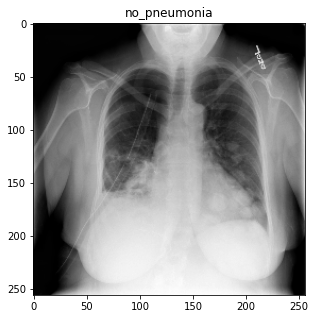

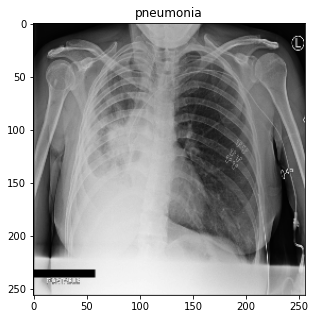

In [4]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

### Get labels and images for each test/train and validation set

In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


### Perform a grayscale normalization to reduce the effect of illumination's differences

In [6]:


# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255



### Reshape data for deep learning

In [7]:


# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Create the CNN

In [8]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.01))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     2

### Train model

In [9]:
#fit model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.00001)
history = model.fit(x_train,y_train, batch_size = 32 ,epochs = 15 , validation_data = (x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/15
94/94 [==============================] - 168s 2s/step - loss: 1.3864 - accuracy: 0.7603 - val_loss: 0.7525 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2/15
94/94 [==============================] - 122s 1s/step - loss: 0.4968 - accuracy: 0.7827 - val_loss: 1.3835 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 3/15
94/94 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.8017
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
94/94 [==============================] - 120s 1s/step - loss: 0.4659 - accuracy: 0.8017 - val_loss: 0.9040 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 4/15
94/94 [==============================] - 120s 1s/step - loss: 0.4018 - accuracy: 0.8220 - val_loss: 1.4849 - val_accuracy: 0.7800 - lr: 3.0000e-04
Epoch 5/15
94/94 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.8243
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
94/94 [==============================] - 118s 1s/st

### Test accuracy

In [10]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 [==============================] - 3s 199ms/step - loss: 0.4436 - accuracy: 0.8240
Loss of the model is -  0.4436114430427551
16/16 [==============================] - 3s 209ms/step - loss: 0.4436 - accuracy: 0.8240
Accuracy of the model is -  82.40000009536743 %


### Model Analysis

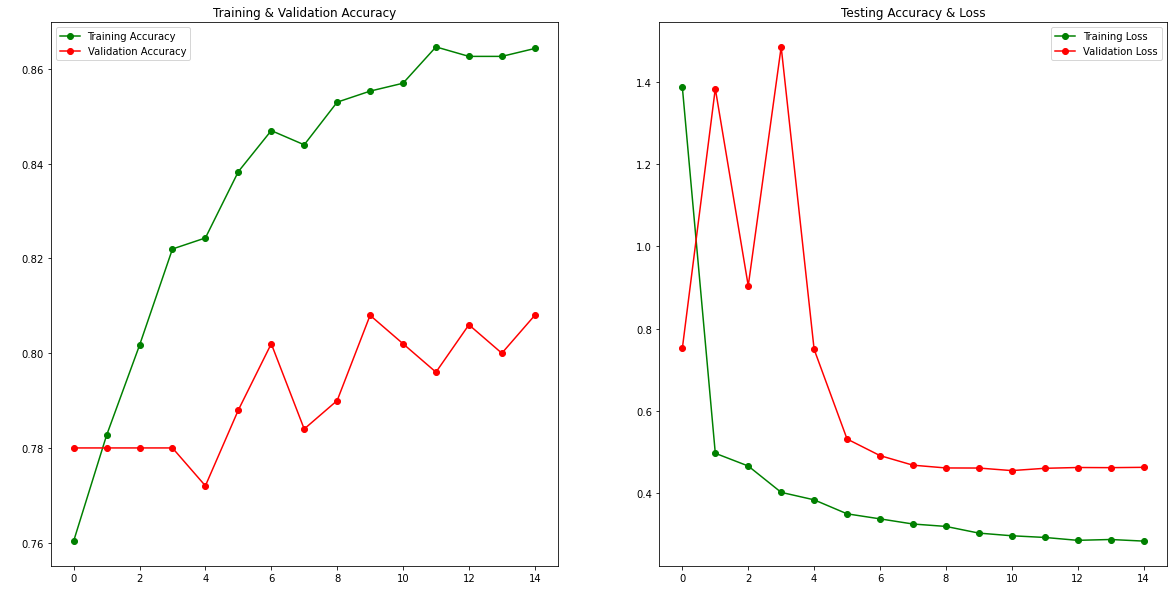

In [12]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs",fontsize=10, color="white")
ax[0].set_ylabel("Accuracy",fontsize=10, color="white")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs",fontsize=10, color="white")
ax[1].set_ylabel("Training & Validation Loss",fontsize=10, color="white")
plt.show()

### Predict outputs labels for test dataset and display first 15 predictions

In [13]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

16/16 [==============================] - 3s 188ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Classification report

In [14]:
print(classification_report(y_test, predictions, target_names = ['No_Pneumonia (Class 0)','Pneumonia (Class 1)']))

                        precision    recall  f1-score   support

No_Pneumonia (Class 0)       0.85      0.94      0.89       395
   Pneumonia (Class 1)       0.63      0.40      0.49       105

              accuracy                           0.82       500
             macro avg       0.74      0.67      0.69       500
          weighted avg       0.81      0.82      0.81       500



### Confusion matrix

In [15]:
cm = confusion_matrix(y_test,predictions)
cm

print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])

True Positive  (TP) =  370
False Positive (FP) =  25
False Negative (FN) =  63
True Negative  (TN) =  42


In [16]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)       
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

Precision Score: 93.67%
Recall Score: 85.45%
F1 Score: 89.37%




### Plot confusion matrix

<AxesSubplot:>

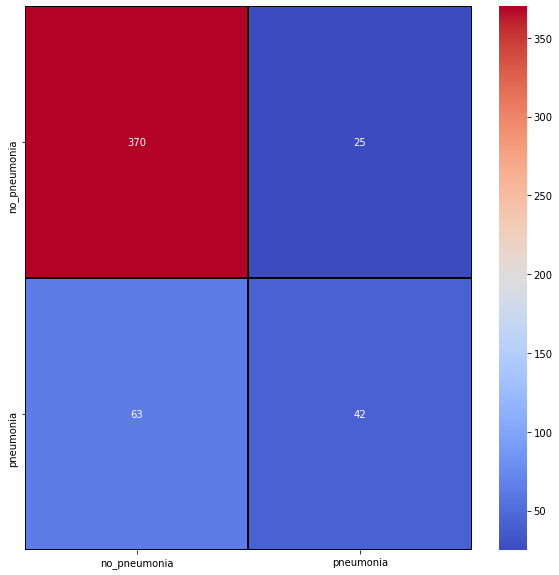

In [17]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "coolwarm", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)



### Seperate Correct and incorrect predictions

In [18]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

### Correctly Predicted Classes

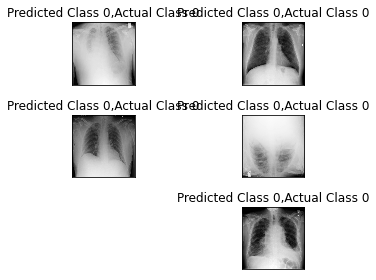

In [19]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Incorrectly Predicted Classes

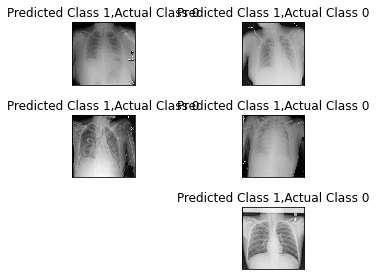

In [20]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1